### **UK ENERGY CONSUMPTION FORCASTING (2005-2030) USING TIME SERIES FORCASTING.**

**1. IMPORT REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from google.colab import files

**2. UPLOAD CSV EXPORTED FROM POWER BI**

In [2]:
uploaded = files.upload()

Saving UK Total Energy Consumption (2005-2020)-1.csv to UK Total Energy Consumption (2005-2020)-1.csv


**3. READ THE CSV FILE.**

In [4]:
df = pd.read_csv("UK Total Energy Consumption (2005-2020)-1.csv")

**CLEAN THE COLUMN NAMES**

In [5]:
df.columns = df.columns.str.strip()

**RENAME COLUMN NAMES FOR CONSISTENCY**

In [6]:
df.rename(columns={'Sum of All_fuels_Total': 'All_fuels_Total'}, inplace=True)

**4. CONVERT 'YEAR' TO DATETIME AND SET AS INDEX.**

In [7]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Preview the cleaned data
df.head()

,All_fuels_Total
Year,
2005-01-01,1.020263e+06
2006-01-01,9.941861e+05
2007-01-01,9.784041e+05
2008-01-01,9.499649e+05
2010-01-01,9.144581e+05


**5. PLOT ORIGINAL DATA (2005-2020)**

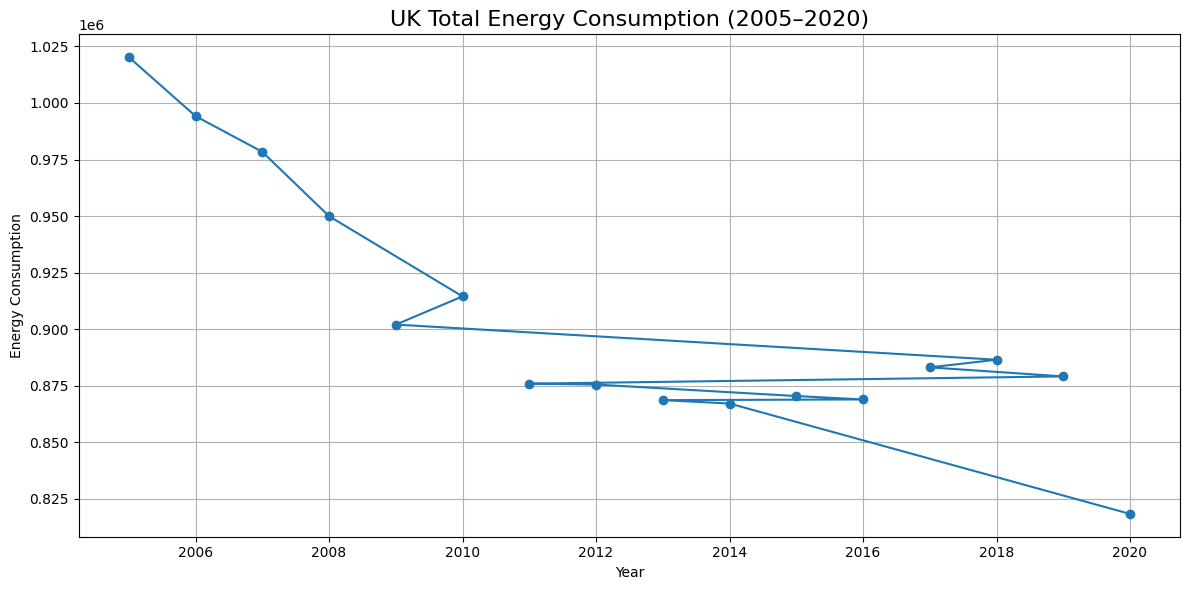

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['All_fuels_Total'], marker='o', linestyle='-')
plt.title('UK Total Energy Consumption (2005–2020)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

# **### ARIMA MODEL IMPLEMENTATION ###**

In [9]:
# Fit the ARIMA model
model = ARIMA(df['All_fuels_Total'], order=(1, 1, 1))
model_fit = model.fit()

# Print Summary
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:        All_fuels_Total   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -163.975
Date:                Sun, 13 Apr 2025   AIC                            333.950
Time:                        19:39:33   BIC                            336.074
Sample:                             0   HQIC                           333.927
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8873      0.091      9.727      0.000       0.709       1.066
ma.L1         -0.9170      0.075    -12.165      0.000      -1.065      -0.769
sigma2      2.314e+08   1.59e-10   1.45e+18      0.0

In [13]:
# Forcast for next 10 years (2021-2030)
forecast = model_fit.forecast(steps=10)
print("Forecast for next 10 years:")
print(forecast)

Forecast for next 10 years:
16    814360.791108
17    810900.351277
18    807829.768392
19    805105.120742
20    802687.434885
21    800542.128168
22    798638.514059
23    796949.363203
24    795450.513934
25    794120.526668
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


**PLOT ACTUAL VS FORECAST.**

<ipython-input-14-675fbabe4ab1>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=f'{last_year + 1}', periods=10, freq='Y')


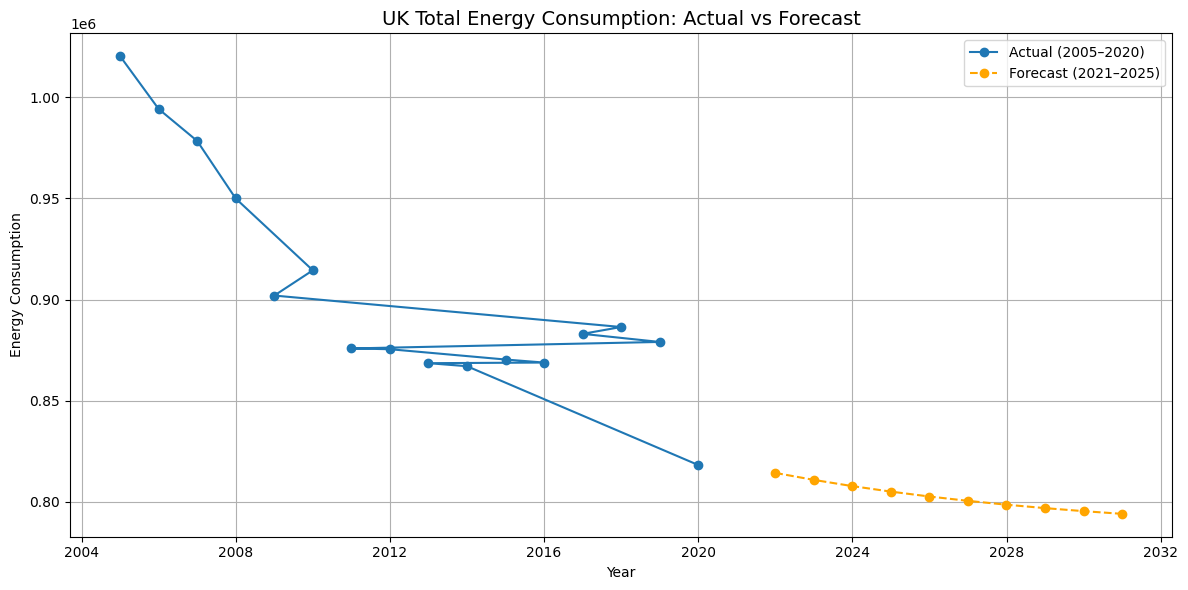

In [14]:
# Create future years index manually
last_year = df.index[-1].year
future_years = pd.date_range(start=f'{last_year + 1}', periods=10, freq='Y')

# Convert forecast to series with proper datetime index
forecast_series = pd.Series(forecast.values, index=future_years)

# Plotting actual vs forecast
plt.figure(figsize=(12,6))
plt.plot(df['All_fuels_Total'], label='Actual (2005–2020)', marker='o')
plt.plot(forecast_series, label='Forecast (2021–2025)', marker='o', linestyle='--', color='orange')
plt.title('UK Total Energy Consumption: Actual vs Forecast', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**ARIMA MODEL EVALUATION.**

In [15]:
# In-sample prediction for training data
arima_pred = model_fit.predict(start=1, end=len(df)-1, typ='levels')

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [17]:
# Align prediction with actual values
actual_values = df['All_fuels_Total'].iloc[1:]  # skip first due to differencing
mae = mean_absolute_error(actual_values, arima_pred)
rmse = np.sqrt(mean_squared_error(actual_values, arima_pred))

print("ARIMA Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

ARIMA Model Evaluation:
MAE: 8924.72
RMSE: 13304.30


# **### EXPONENTIAL SMOOTHING (ETS) IMPLEMENTATION ###**

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [19]:
# Fit Exponential Smoothing model (Holt's Linear Trend Model)
ets_model = ExponentialSmoothing(df['All_fuels_Total'], trend='add', seasonal=None)
ets_fit = ets_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [20]:
# Forcast for next 10 years with ETS.
ets_forecast = ets_fit.forecast(steps=10)
print("ETS Forecast (2021–2030):")
print(ets_forecast)

ETS Forecast (2021–2030):
16    804036.741084
17    789632.646785
18    775228.552486
19    760824.458187
20    746420.363889
21    732016.269590
22    717612.175291
23    703208.080992
24    688803.986694
25    674399.892395
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


**PLOT ETS MODEL.**

<ipython-input-21-1b4f9fe1da11>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=11, freq='Y')[1:], ets_forecast,


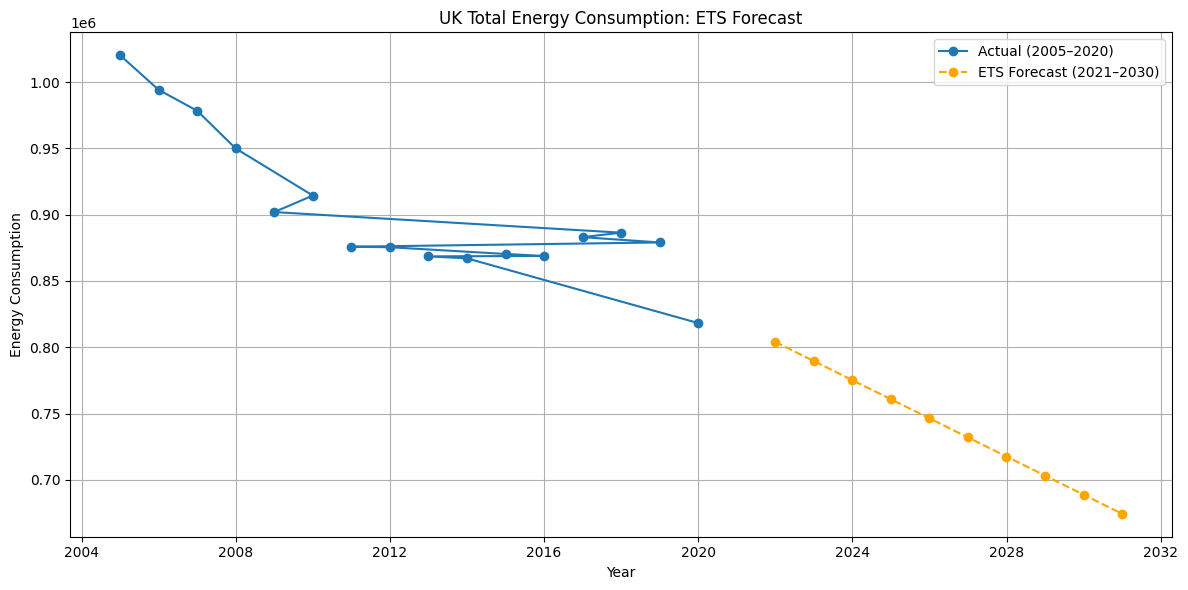

In [21]:
# Plot actual + ETS forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['All_fuels_Total'], label='Actual (2005–2020)', marker='o')
plt.plot(pd.date_range(start=df.index[-1], periods=11, freq='Y')[1:], ets_forecast,
         label='ETS Forecast (2021–2030)', linestyle='--', marker='o', color='orange')
plt.title('UK Total Energy Consumption: ETS Forecast')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**ETS MODEL EVALUATION.**

In [22]:
# Predict in-sample values
ets_in_sample_pred = ets_fit.fittedvalues

In [23]:
# Compare with actual values
mae_ets = mean_absolute_error(df['All_fuels_Total'], ets_in_sample_pred)
rmse_ets = np.sqrt(mean_squared_error(df['All_fuels_Total'], ets_in_sample_pred))

print("ETS Model Evaluation:")
print(f"MAE: {mae_ets:.2f}")
print(f"RMSE: {rmse_ets:.2f}")

ETS Model Evaluation:
MAE: 12813.32
RMSE: 14892.73


# **### FINAL COMPARISON: ARIMA VS ETS MODEL. ###**

In [24]:
# Create future date range from 2021 to 2030
future_years = pd.date_range(start='2021', periods=10, freq='Y')

<ipython-input-24-42ae4c912186>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start='2021', periods=10, freq='Y')


In [26]:
# Store forecasts into clear variables for comparison
forecast_arima = model_fit.forecast(steps=10)
forecast_ets = ets_forecast

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


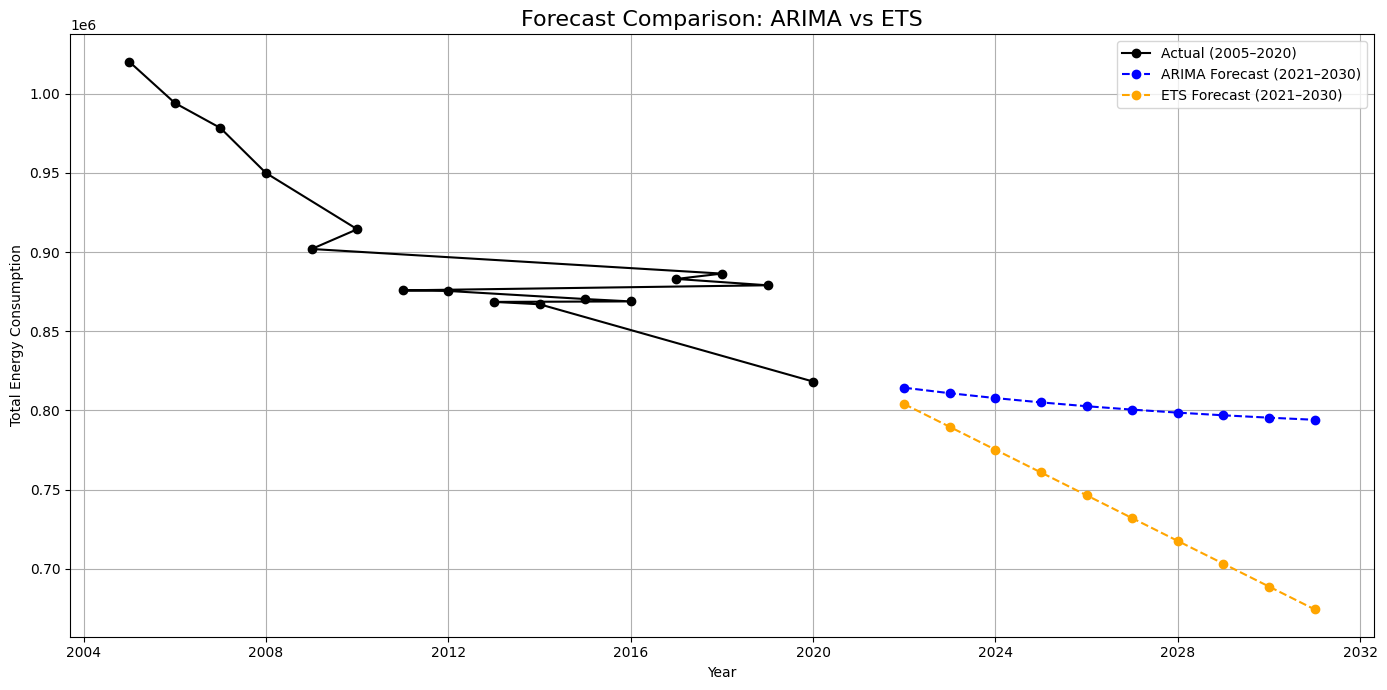

In [27]:
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(df.index, df['All_fuels_Total'], label='Actual (2005–2020)', color='black', marker='o')

# Plot ARIMA forecast
plt.plot(future_years, forecast_arima, label='ARIMA Forecast (2021–2030)', linestyle='--', marker='o', color='blue')

# Plot ETS forecast
plt.plot(future_years, forecast_ets, label='ETS Forecast (2021–2030)', linestyle='--', marker='o', color='orange')

# Chart styling
plt.title('Forecast Comparison: ARIMA vs ETS', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()